In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from DataPrepocess import ImageData, MaskData, YOLOSegmentation, PointCloud, BBox

In [ ]:
folder_path = 'D:\code\dl_challenge'

yoloimages = ImageData()
yolomasks = MaskData()
yoloseg = YOLOSegmentation()
yolopc = PointCloud()



In [ ]:
from helper import Helper

helperfns = Helper()

In [ ]:
yoloimages.read_all_files(folder_path)
yolopc.read_all_files(folder_path)
yolomasks.read_all_files(folder_path)
yoloseg.process_masks(yolomasks.masks)


In [ ]:
boxes = BBox()
bboxes = boxes.get_bounding_box_list(yolomasks.masks)

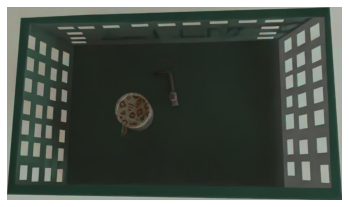

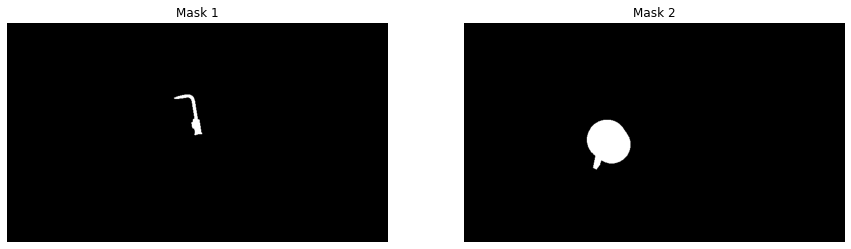

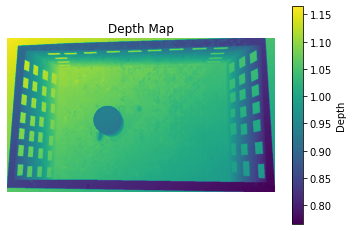

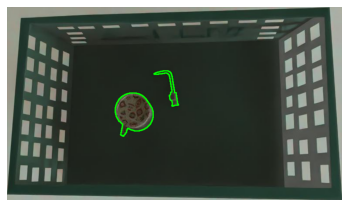

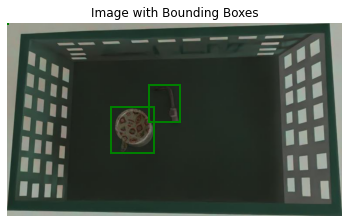

In [ ]:
index = random.randint(0, len(yoloimages.images) - 1)
yoloimages.display_a_file(yoloimages.images[index].copy())
yolomasks.display_a_file(yolomasks.masks[index].copy())
yolopc.display_a_file(yolopc.pcs[index].copy())
yoloseg.display_a_file(yoloimages.images[index].copy(), yoloseg.contours[index].copy())
helperfns.draw_yolo_bboxes(bboxes[index], yoloimages.images[index].copy())

In [ ]:
from sklearn.model_selection import train_test_split

images_train, images_temp, masks_train, masks_temp, seg_train, seg_temp, bboxes_train, bboxes_temp = train_test_split(
    yoloimages.images, yolomasks.masks, yoloseg.contours, bboxes, test_size=0.2, random_state=42
)

images_val, images_test, masks_val, masks_test, seg_val, seg_test, bboxes_val,  bboxes_test = train_test_split(
    images_temp, masks_temp, seg_temp, bboxes_temp, test_size=0.5, random_state=42
)

In [ ]:
from DataPrepocess import DatasetSaver

In [ ]:
det_data_saver_path = 'D:\code\det_data'

det_dataset_saver = DatasetSaver(det_data_saver_path, images_train, images_val, images_test, bboxes_train, bboxes_val, bboxes_test)
det_dataset_saver.save_images()
det_dataset_saver.generate_bb_txt_from_mask()

Saved 160 training images, 20 validation images, 20 testing images.
Saved 160 training txt, 20 validation txt, 20 testing txt.


In [ ]:
seg_data_saver_path = 'D:\code\seg_data'

seg_dataset_saver = DatasetSaver(seg_data_saver_path, images_train, images_val, images_test, seg_train, seg_val, seg_test)
seg_dataset_saver.save_images()
seg_dataset_saver.generate_txt_from_mask()


Saved 160 training images, 20 validation images, 20 testing images.
Saved 160 training txt, 20 validation txt, 20 testing txt.
